In [1]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import omembrane as omem
import openmm as mm
from openmm import app as app
from openmm import unit as u
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm
from sys import stdout

from openmm import LocalEnergyMinimizer

In [2]:
molsys = msm.convert('memb_popc_100_stage_3_1.h5msm')

In [3]:
P_atoms = msm.select(molsys, selection='atom_type=="P" and molecule_type=="lipid"')
N_atoms = msm.select(molsys, selection='atom_type=="N" and molecule_type=="lipid"')
O_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="lipid"')
C_atoms = msm.select(molsys, selection='atom_type=="C" and molecule_type=="lipid"')
OW_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="water"')

PO_heads_atoms = msm.select(molsys, selection='atom_name in ["P","O11","O12","O13","O14"] and molecule_type=="lipid"')

In [4]:
topology = msm.convert(molsys, 'openmm.topology')
positions = msm.get(molsys, coordinates=True)

In [5]:
forcefield = mm.app.ForceField("amber14-all.xml", "amber14/tip3p.xml")

In [6]:
system = forcefield.createSystem(topology, nonbondedMethod=app.PME, nonbondedCutoff=1.2*u.nanometer, constraints=app.HBonds)

In [7]:
friction = 1 / u.picosecond
timestep = 2 * u.femtoseconds
temperature = 0.0 * u.kelvin
integrator = mm.LangevinIntegrator(temperature, friction, timestep)

In [8]:
pressure = 1.0 * u.bar
surface_tension = 0.0 * u.bar * u.nanometer
xymode = 0
zmode = 0
barostat_frequency = 25

barostat = mm.MonteCarloMembraneBarostat(pressure, surface_tension, temperature, xymode, zmode, barostat_frequency)

# Añadir el barostato al sistema
system.addForce(barostat)

5

In [9]:
platform = mm.Platform.getPlatformByName("CUDA")

In [10]:
simulation = app.Simulation(topology, system, integrator, platform)
simulation.context.setPositions(msm.pyunitwizard.convert(positions[0], to_form='openmm.unit'))

In [11]:
msm.thirds.openmm.forces.harmonic_potential_to_plane(simulation.context, selection=PO_heads_atoms,
                                                     force_constant=5000.0*u.kilojoules_per_mole/(u.nanometer**2),
                                                     point=None, vector=[0,0,1], pbc=True, adding_force=True)

6

In [12]:
simulation.minimizeEnergy()

In [13]:
state_init = simulation.context.getState(getPositions=True, enforcePeriodicBox=True)

In [15]:
reporter = app.StateDataReporter(stdout, 10000, step=True, potentialEnergy=True, temperature=True, volume=True)
simulation.reporters = [reporter]

In [16]:
temperature=50*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

temperature=100*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

temperature=150*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

temperature=200*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

temperature=250*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

temperature=300*u.kelvin
simulation.integrator.setTemperature(temperature)
barostat.setDefaultTemperature(temperature)
simulation.context.reinitialize(preserveState=True)
simulation.step(10000) #

#"Step","Potential Energy (kJ/mole)","Temperature (K)","Box Volume (nm^3)"
10000,-872877.7830564049,49.9881162052055,563.3150820677112
20000,-844834.0414201282,100.26685947667985,567.520888216061
30000,-813617.5179805611,150.28258236155926,571.2846307813929
40000,-773595.2272825115,200.31706785897762,574.03605989829
50000,-722693.1205744972,248.52054273871448,580.3785999910356
60000,-674746.1989198811,298.6300156567078,591.6396906891114


In [17]:
print('4000')
simulation.context.setParameter('k', 4000*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('3000')
simulation.context.setParameter('k', 3000*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('2000')
simulation.context.setParameter('k', 2000*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('1000')
simulation.context.setParameter('k', 1000*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('500')
simulation.context.setParameter('k', 500*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('250')
simulation.context.setParameter('k', 250*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

print('0')
simulation.context.setParameter('k', 0*u.kilojoules_per_mole/(u.nanometer**2))
simulation.context.reinitialize(preserveState=True)
simulation.step(50000)

4000
70000,-672590.1406119596,302.2965228032238,592.0168213350814
80000,-674011.0675007128,299.05164856876667,591.1683729391599
90000,-674825.958634784,302.1908977045824,590.848089102009
100000,-675561.5121510751,299.95864425049047,591.4051648421523
110000,-675662.5169438096,302.8357109655483,591.2824187672046
3000
120000,-673713.7763387426,301.4933080340704,591.6842506150628
130000,-673691.1774094962,299.0074134787792,591.9215664377018
140000,-675637.152471879,302.22477494103833,591.360829171791
150000,-673413.8436764865,300.4485918749976,591.7182928751134
160000,-675009.1828128337,300.4966213319561,591.3440841930643
2000
170000,-673669.6268423237,301.1487763214152,590.4200238034855
180000,-674281.3826890262,300.83161867661096,590.0575010773043
190000,-675587.0020997468,300.1938126711625,590.4642269228825
200000,-674909.7247037902,301.9738650483945,590.9285522794017
210000,-675204.8589784834,299.43965578210805,589.8626095252419
1000
220000,-674966.7373183542,302.36244551608024,589.884

In [19]:
state_end = simulation.context.getState(getPositions=True, enforcePeriodicBox=True)

/fast_data/home/diego/miniconda3/envs/OMembrane@uibcdf_3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


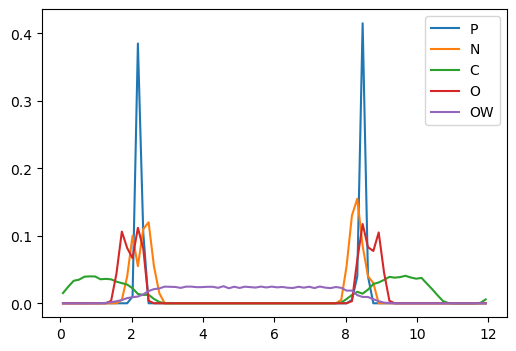

In [20]:
bins_edges_P_init, density_P_init = omem.analysis.get_lineal_density(state_init, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_N_init, density_N_init = omem.analysis.get_lineal_density(state_init, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_C_init, density_C_init = omem.analysis.get_lineal_density(state_init, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_O_init, density_O_init = omem.analysis.get_lineal_density(state_init, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_OW_init, density_OW_init = omem.analysis.get_lineal_density(state_init, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)


plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')
plt.legend()

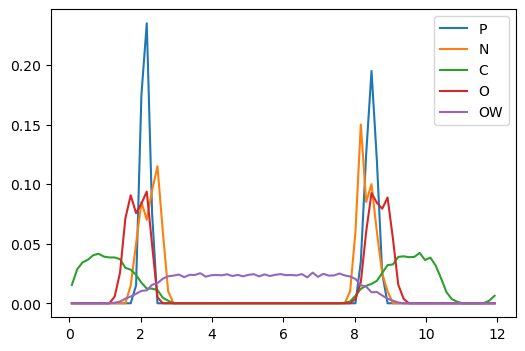

In [21]:
bins_edges_P_end, density_P_end = omem.analysis.get_lineal_density(state_end, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_N_end, density_N_end = omem.analysis.get_lineal_density(state_end, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_C_end, density_C_end = omem.analysis.get_lineal_density(state_end, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_O_end, density_O_end = omem.analysis.get_lineal_density(state_end, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_OW_end, density_OW_end = omem.analysis.get_lineal_density(state_end, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)

plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end, label='P')
plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end, label='N')
plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end, label='C')
plt.plot((bins_edges_O_end[1:]+bins_edges_O_end[:-1])/2, density_O_end, label='O')
plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end, label='OW')
plt.legend()
plt.show()

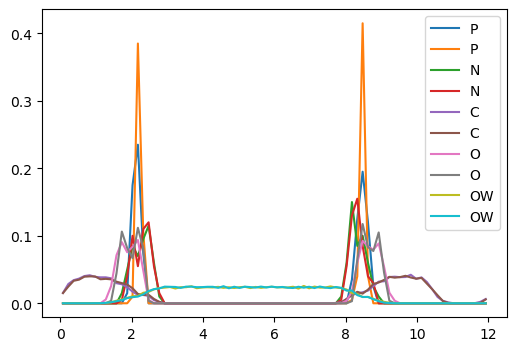

In [22]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end, label='P')
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')

plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end, label='N')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')

plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end, label='C')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')

plt.plot((bins_edges_O_end[1:]+bins_edges_O_end[:-1])/2, density_O_end, label='O')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')

plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end, label='OW')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')

plt.legend()
plt.show()

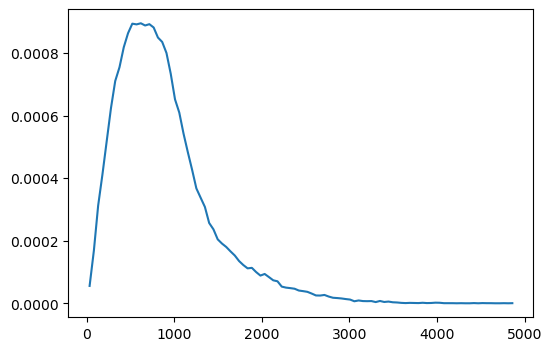

In [23]:
forces = msm.molecular_mechanics.get_forces(simulation.context, norm=True)
h, bins = np.histogram(puw.get_value(forces), bins=100, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), h)
plt.show()

In [ ]:
#memb_antes = msm.extract(molsys, selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')
#memb_despues = msm.extract([molsys, simulation.context], selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')

In [ ]:
#msm.view(memb_despues)

In [24]:
coordinates, box = msm.get(state_end, coordinates=True, box=True)
msm.set(molsys, coordinates=coordinates, box=box)

In [27]:
msm.view(molsys, standard=False)

NGLWidget()

In [26]:
msm.convert(molsys, 'memb_popc_100_stage_3_2.h5msm')

'memb_popc_100_stage_3_2.h5msm'